In [1]:
!pip -q install rtree

     |████████████████████████████████| 1.0 MB 15.8 MB/s 


let's create an empty R-tree

In [2]:
from rtree import index

p = index.Property()

idx = index.Index(properties=p)


let's print the R-tree


In [3]:
idx  

rtree.index.Index(bounds=[1.7976931348623157e+308, 1.7976931348623157e+308, -1.7976931348623157e+308, -1.7976931348623157e+308], size=0)

Let's insert a point:

In [4]:
idx.insert(4321, (34, 26, 49, 41), obj=42)

In [5]:
#let's print again
idx

rtree.index.Index(bounds=[34.0, 26.0, 49.0, 41.0], size=1)

The R-tree has a new min boundary, the just inserted minBBX


Let's query the R-tree if a MinBox intersects with the given BBX


In [6]:
hits = idx.intersection((0, 0, 35, 35), objects=True)

for i in hits:
  if i.id == 4321:
    print(i.object)
    print(i.bbox)

42
[34.0, 26.0, 49.0, 41.0]


Counting the number of index objects


In [7]:
print(idx.count((0, 0, 60, 60)))

1


Similarly, we can delete objects from the index:

In [8]:
idx.delete(4321, (34.3776829412, 26.7375853734, 49.3776829412, 41.7375853734))
print(idx.count((0, 0, 60, 60)))

1


How to retrieve objects in an intersection with the R-tree:

In [9]:
idx.insert(4321, (34.3776829412, 26.7375853734, 49.3776829412,41.7375853734), obj=44)
hits = list(idx.intersection((0, 0, 60, 60), objects=True))
[(item.object, item.bbox) for item in hits if item.id == 4321]

[(42, [34.0, 26.0, 49.0, 41.0]),
 (44, [34.3776829412, 26.7375853734, 49.3776829412, 41.7375853734])]

In [11]:
!pip -q install shapely

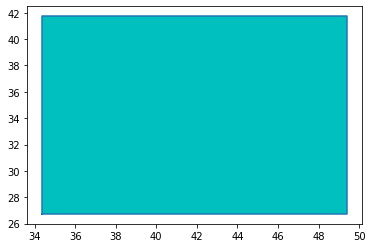

In [12]:
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

def display(poly):
    x, y = poly.exterior.xy
    plt.plot(x, y)
    plt.fill(x, y, "c")
    plt.show()


poly = Polygon([(34.3776829412, 26.7375853734), (49.3776829412, 26.7375853734), (49.3776829412,41.737585373), (34.3776829412, 41.737585373)])

display(poly)

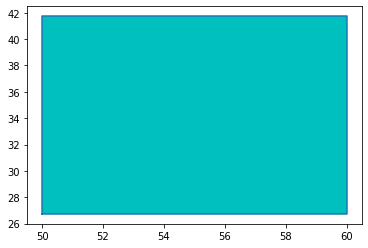

In [ ]:
poly2 = Polygon([(50, 26.7375853734), (60, 26.7375853734), (60,41.737585373), (50, 41.737585373)])
display(poly2)

In [ ]:
idx.insert(4321, (50, 26.7375853734, 60, 41.737585373), obj=41)

Now, we have two rectangles in the R-tree. 
Let's intersect again with a bounding box that intersects both rectangles.

In [ ]:
hits = list(idx.intersection((0, 0, 60, 60), objects=True))
[(item.object, item.bbox) for item in hits if item.id == 4321]

[(42, [34.0, 26.0, 49.0, 41.0]),
 (44, [34.3776829412, 26.7375853734, 49.3776829412, 41.7375853734]),
 (41, [50.0, 26.7375853734, 60.0, 41.737585373])]